# practise_chapter_19

## residuals_acf_plot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [3]:
series = pd.read_csv(
    "../data/daily-total-female-births.csv", header=0, index_col=0, parse_dates=True
).squeeze()
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [9]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)

dataframe.columns = ["t", "t+1"]
X = dataframe.values

In [11]:
train_size = int(len(X) * 0.66)
train_size

240

In [13]:
train, test = X[1:train_size], X[train_size:]  # skip the first row w/ nan value
train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

In [16]:
# persistence model
predictions = [x for x in test_X]

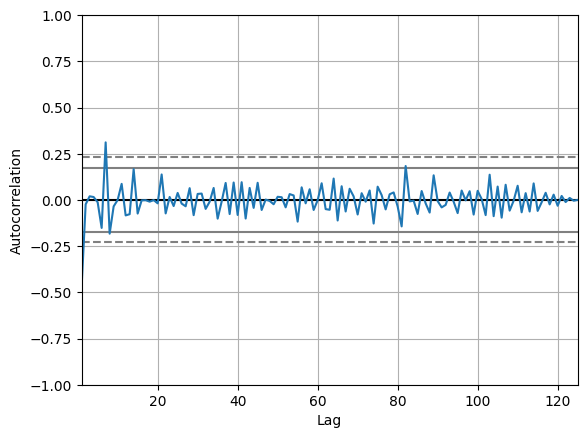

In [17]:
# calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
autocorrelation_plot(residuals)
plt.show()

## residuals_density_plot

In [18]:
# density plots of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = read_csv(
    "../data/daily-total-female-births.csv", header=0, index_col=0, parse_dates=True
).squeeze()
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ["t", "t+1"]
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

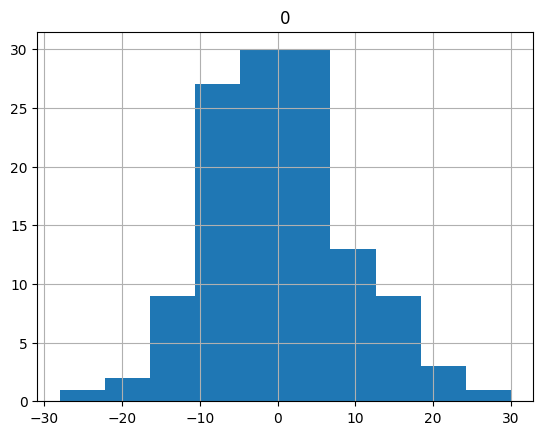

In [19]:
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# histogram plot
residuals.hist()
pyplot.show()

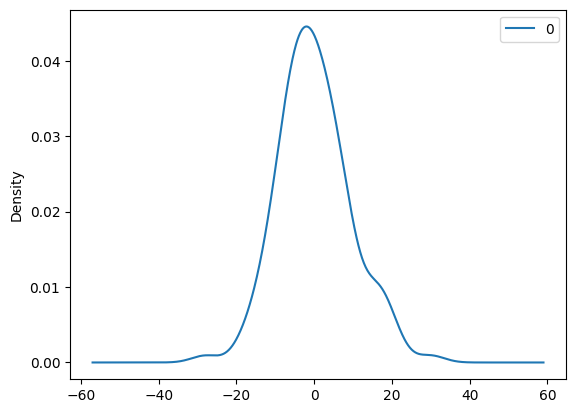

In [20]:
# density plot
residuals.plot(kind="kde")
pyplot.show()

## persistence_forecast

In [21]:
# calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
print(residuals.head())

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


## residuals_line_plot

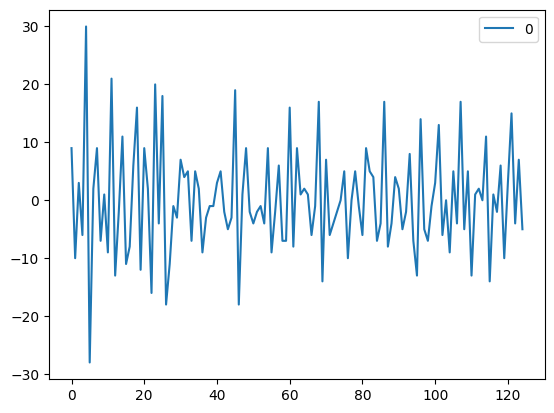

In [22]:
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# plot residuals
residuals.plot()
pyplot.show()

## residuals_stats

In [23]:
# calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# summary statistics
print(residuals.describe())

                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


## residuals_qq_plot

In [28]:
from statsmodels.graphics.gofplots import qqplot
import numpy

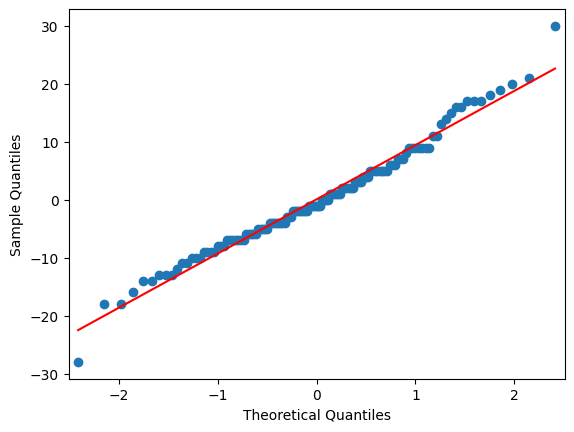

In [29]:
# calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)
qqplot(residuals, line="r")
pyplot.show()